# Exploratory Data Analysis (Análise Exploratória dos Dados)

Etapa de análise exploratória de dados com o intuito de conhecer a base de dados e a forma com que os dados são distribuídos para determinar sua adequação em relação a aplicação da solução do problema

In [218]:
import pandas as pd
import matplotlib.pyplot as plt

# Imprime os 5 primeiros registros da tabela
df = pd.read_csv('../../Dataset/notas_fiscais_cleaned.csv', encoding='latin-1')
df.head(5)

,Numero,Data_de_emissao,Situacao,Valor_total_da_nota,CPF_CNPJ_emit,Bairro_distrito_emit,CEP_emit,Municipio_emit,CPF_CNPJ_dest,Bairro_distrito_dest,CEP_dest,Municipio_dest,Base_de_Calculo_do_ICMS,Valor_do_ICMS,Valor_total_dos_produtos,Valor_do_frete,Valor_do_seguro,Valor_desconto,Valor_outras_despesas_acessorias,Valor_do_IPI,Nr_item,Cod_prod,NCM_prod,CST_prod,CFOP_prod,Quant_prod,Valor_unit_prod,Valor_total_prod,Valor_desconto_item,BC_ICMS_prod,Valor_ICMS_prod,Aliq_ICMS_prod,Valor_IPI_prod,Aliq_IPI_prod,Valor_PMC_prod,Cod_EAN,Unid_prod
0,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.1,0.0,0.0,8.11,0.0,0.0,1,085213,39261000.0,0.0,5929.0,1.0,9.95,9.95,1.49,0.0,0.0,0.0,0.0,0.0,NaN,7.897833e+12,und
1,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.1,0.0,0.0,8.11,0.0,0.0,2,088949,96084000.0,0.0,5929.0,1.0,8.30,8.30,1.24,0.0,0.0,0.0,0.0,0.0,NaN,7.898538e+12,und
2,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.1,0.0,0.0,8.11,0.0,0.0,3,082601,96084000.0,0.0,5929.0,1.0,6.95,6.95,1.04,0.0,0.0,0.0,0.0,0.0,NaN,7.898538e+12,und
3,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.1,0.0,0.0,8.11,0.0,0.0,4,083267,96082000.0,0.0,5929.0,1.0,3.70,3.70,0.55,0.0,0.0,0.0,0.0,0.0,NaN,3.154147e+12,und
4,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.1,0.0,0.0,8.11,0.0,0.0,5,084814,84729040.0,0.0,5929.0,1.0,16.50,16.50,2.47,0.0,0.0,0.0,0.0,0.0,NaN,7.897477e+12,und


In [219]:
# Faz o casting da variável de data
df['Data_de_emissao'] = pd.to_datetime(df['Data_de_emissao'])
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089295 entries, 0 to 2089294
Data columns (total 37 columns):
 #   Column                            Non-Null Count    Dtype         
---  ------                            --------------    -----         
 0   Numero                            2089295 non-null  int64         
 1   Data_de_emissao                   2089295 non-null  datetime64[ns]
 2   Situacao                          2089295 non-null  object        
 3   Valor_total_da_nota               2089295 non-null  float64       
 4   CPF_CNPJ_emit                     2089295 non-null  int64         
 5   Bairro_distrito_emit              2089292 non-null  object        
 6   CEP_emit                          2089295 non-null  float64       
 7   Municipio_emit                    2089295 non-null  object        
 8   CPF_CNPJ_dest                     2089295 non-null  int64         
 9   Bairro_distrito_dest              2089295 non-null  object        
 10  CEP_dest          

In [220]:
# Imprime a quantidade de notas fiscais unicas da base
len(df['Numero'].unique())

66765

In [221]:
# Descobre a primeira e ýultima datas das notas da base
df['Data_de_emissao'].describe()

C:\Users\breno\AppData\Local\Temp\ipykernel_10172\1842925249.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['Data_de_emissao'].describe()


count                 2089295
unique                 231174
top       2016-12-29 00:00:00
freq                     4882
first     2016-01-01 08:57:57
last      2016-12-31 23:01:00
Name: Data_de_emissao, dtype: object

In [222]:
# Imprime a quantidade de dias que contém registros
len(df['Data_de_emissao'].dt.date.unique())

366

In [223]:
# Imprime os valores únicos da coluna Situacao
df['Situacao'].unique()

array(['a', 'c', 'i', 'd'], dtype=object)

<AxesSubplot:>

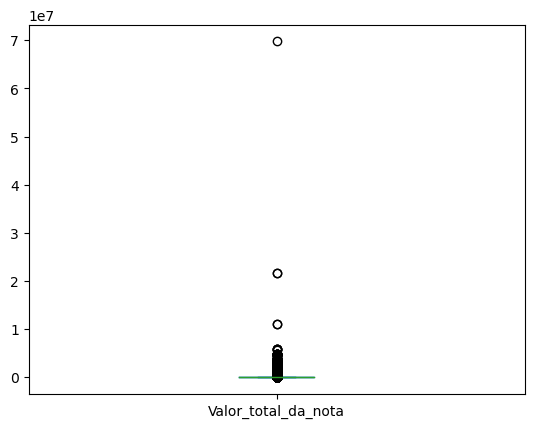

In [224]:
# Plota um boxplot da coluna Valor Total da Nota
df['Valor_total_da_nota'].plot.box()

In [225]:
# Imprime a quantidade de registros com valor zerado do Valor Tota da Nota
(df['Valor_total_da_nota'] == 0).sum()

700

In [226]:
df['Valor_total_da_nota'].describe()

count    2.089295e+06
mean     8.888372e+03
std      7.163098e+04
min      0.000000e+00
25%      1.049440e+03
50%      2.783150e+03
75%      7.000000e+03
max      6.977796e+07
Name: Valor_total_da_nota, dtype: float64

In [227]:
# Imprime a quantidade de valores únicos da coluna CPF_CNPJ_emit
len(df['CPF_CNPJ_emit'].unique())

9384

In [359]:
# Imprime a quantidade de valores únicos da coluna Municipio_emit
len(df['Municipio_emit'].unique())

685

In [361]:
distinct_count = df['Municipio_emit'].append(df['Municipio_dest']).nunique()
distinct_count

C:\Users\breno\AppData\Local\Temp\ipykernel_10172\1212294656.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distinct_count = df['Municipio_emit'].append(df['Municipio_dest']).nunique()


921

In [228]:
# Imprime a quantidade de valores únicos da coluna Bairro_distrito_emit
len(df['Bairro_distrito_emit'].unique())

1739

In [229]:
# Imprime a quantidade de valores únicos da coluna CEP_emit
len(df['CEP_emit'].unique())

3459

In [230]:
# Imprime a quantidade de valores únicos da coluna CPF_CNPJ_dest
len(df['CPF_CNPJ_dest'].unique())

1168

In [231]:
# Imprime a quantidade de valores únicos da coluna Bairro_distrito_dest
len(df['Bairro_distrito_dest'].unique())

962

In [232]:
# Imprime a quantidade de valores únicos da coluna CEP_dest
len(df['CEP_dest'].unique())

1453

In [233]:
# Imprime a quantidade de valores únicos da coluna Municipio_dest
len(df['Municipio_dest'].unique())

486

In [234]:
# Imprime todos os municípios únicos da base
df['Municipio_dest'].unique()

array(['nazarezinho', 'campina grande', 'agua branca', 'aguiar',
       'alagoa grande', 'alagoa nova', 'alagoinha', 'alcantil',
       'algodao de jandaira', 'algodao de jand', 'alhandra', 'amparo',
       'aparecida', 'aracagi', 'araçagi', 'araeccedil;agi', 'arara',
       'areia', 'aroeiras', 'assuncao', 'joao pessoa', 'mari',
       'baia da traicao', 'bananeiras', 'bananaeira',
       'barra de santa rosa', 'barra de santana', 'bayeux', 'belem',
       'belem do brejo do cruz', 'belém do brejo do cruz', 'boa vista',
       'bom jesus', 'boqueirao', 'cabaceiras', 'cabedelo',
       'cacimba de dentro', 'cajazeiras', 'cajazeirinhas', 'camalau',
       'parari', 'araruna', 'areia de baraunas', 'areial', 'barauna',
       'barra de sao miguel', 'boa ventura', 'bom sucesso',
       'brejo do cruz', 'brejo dos santos', 'caapora', 'cacimba de areia',
       'cacimbas', 'caicara', 'caldas brandao', 'campo de santana',
       'caraubas', 'carrapateira', 'catingueira', 'conceicao', 'conde',

In [235]:
df['Base_de_Calculo_do_ICMS'].describe()

count    2.089295e+06
mean     2.008466e+03
std      2.688265e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.415000e+02
max      2.498500e+06
Name: Base_de_Calculo_do_ICMS, dtype: float64

## Histogramas e boxplots sobre os dados

In [1]:
# Encontra o número de registros que possuem o valor da coluna Base_de_Calculo_do_ICMS como 0
(df['Base_de_Calculo_do_ICMS'] == 0).sum()

NameError: name 'df' is not defined

<AxesSubplot:>

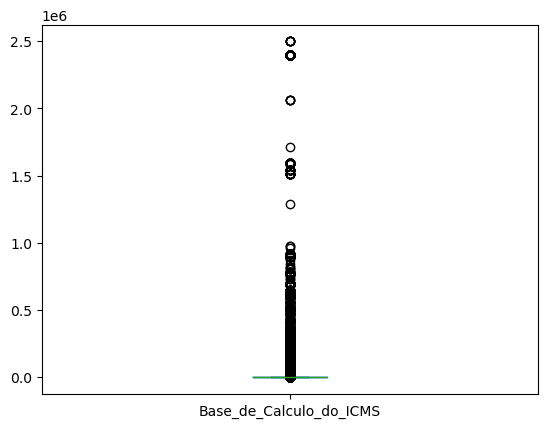

In [237]:
# Plota um boxplot da coluna Base_de_Calculo_do_ICMS
df['Base_de_Calculo_do_ICMS'].plot.box()

<AxesSubplot:>

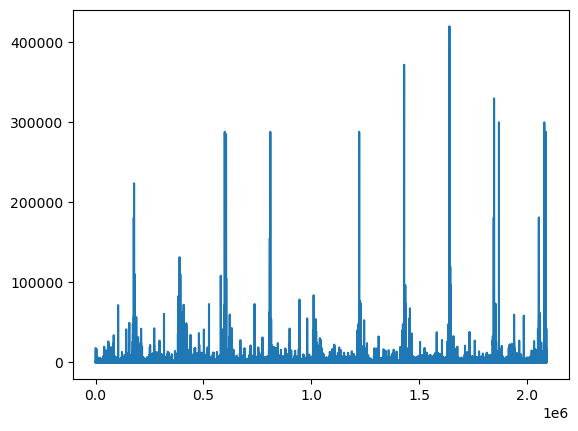

In [238]:
df['Valor_do_ICMS'].plot()

In [239]:
(df['Valor_do_ICMS'] == 0).sum()

1531939

<AxesSubplot:>

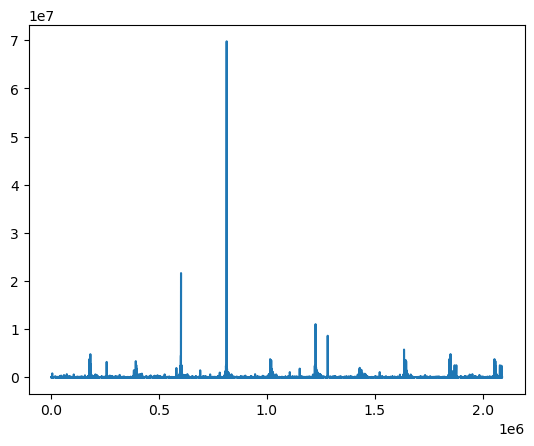

In [240]:
df['Valor_total_dos_produtos'].plot()

In [241]:
(df['Valor_total_dos_produtos'] == 0).sum()

1327

<AxesSubplot:>

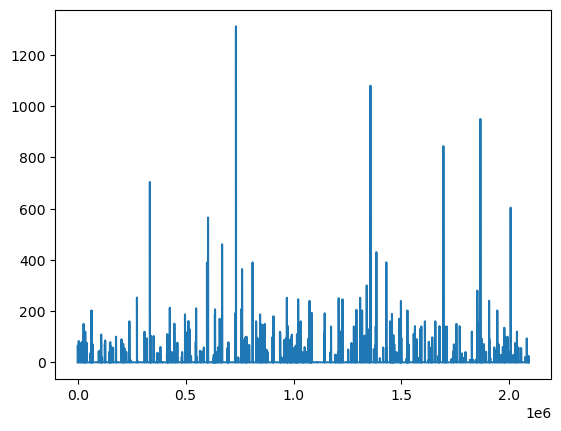

In [242]:
# Plota um histograma da coluna Valor_do_frete
df['Valor_do_frete'].plot()

In [243]:
(df['Valor_do_frete'] == 0).sum()

2088129

<AxesSubplot:>

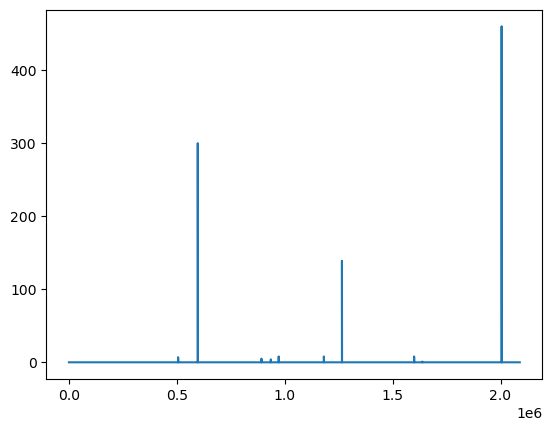

In [244]:
df['Valor_do_seguro'].plot()

In [245]:
(df['Valor_do_seguro'] == 0).sum()

2089158

<AxesSubplot:>

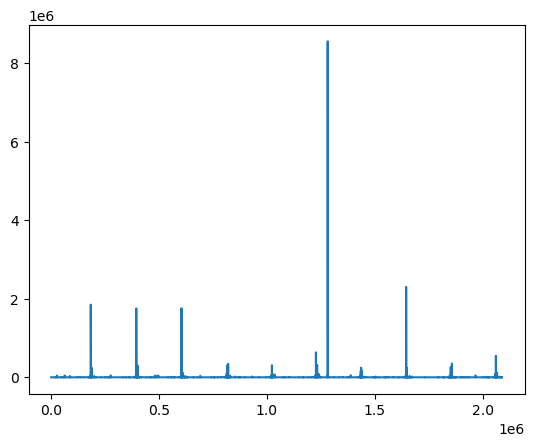

In [246]:
df['Valor_desconto'].plot()

In [247]:
(df['Valor_desconto'] == 0).sum()

1921149

<AxesSubplot:>

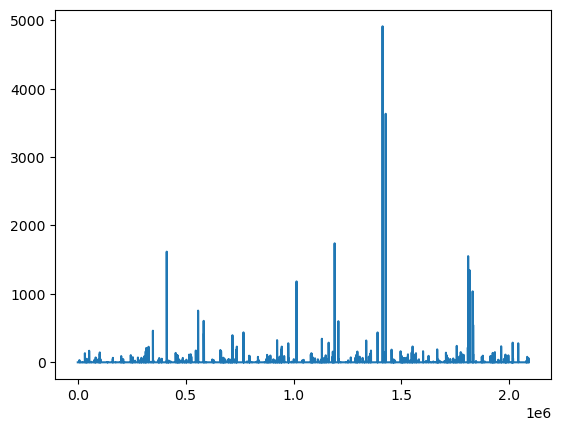

In [248]:
df['Valor_outras_despesas_acessorias'].plot()

In [249]:
(df['Valor_outras_despesas_acessorias'] == 0).sum()

2081443

<AxesSubplot:>

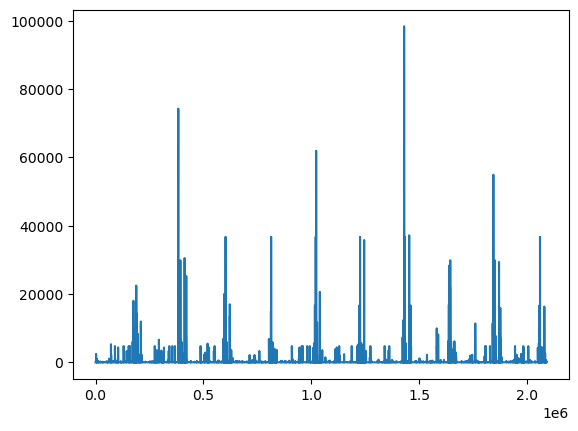

In [250]:
df['Valor_do_IPI'].plot()

In [251]:
(df['Valor_do_IPI'] == 0).sum()

2084769

In [252]:
len(df['Nr_item'].unique())

691

In [253]:
len(df['Cod_prod'].unique())

176397

In [254]:
len(df['NCM_prod'].unique())

6005

In [255]:
len(df['CST_prod'].unique())

12

In [256]:
(df['CST_prod'] == 0).sum()

423421

In [257]:
len(df['CFOP_prod'].unique())

184

In [258]:
df['CFOP_prod'].isnull().sum()

22263

<AxesSubplot:>

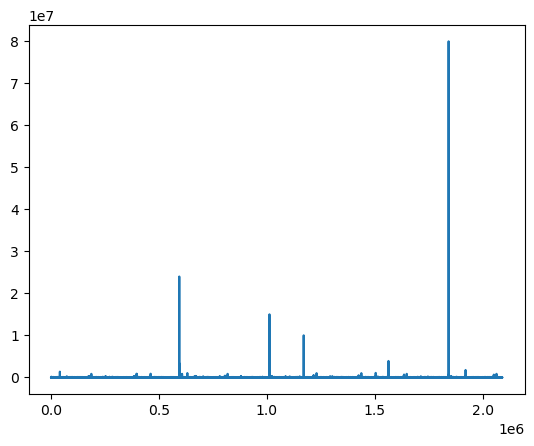

In [259]:
df['Quant_prod'].plot()

In [260]:
(df['Quant_prod'] == 0).sum()

124

<AxesSubplot:>

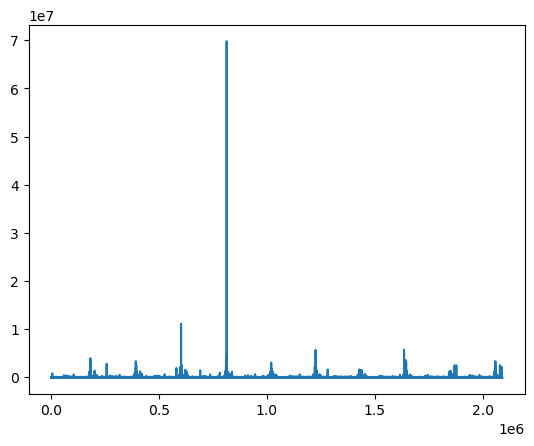

In [261]:
df['Valor_total_prod'].plot()

In [262]:
(df['Valor_total_prod'] == 0).sum()

5012

<AxesSubplot:>

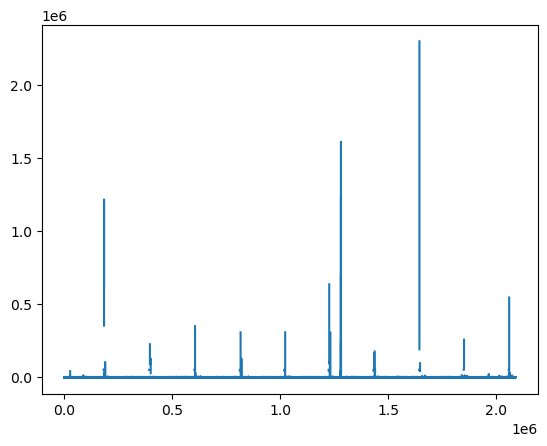

In [263]:
df['Valor_desconto_item'].plot()

In [264]:
(df['Valor_desconto_item'] == 0).sum()

0

In [265]:
df['Valor_desconto_item'].isnull().sum()

1944092

<AxesSubplot:>

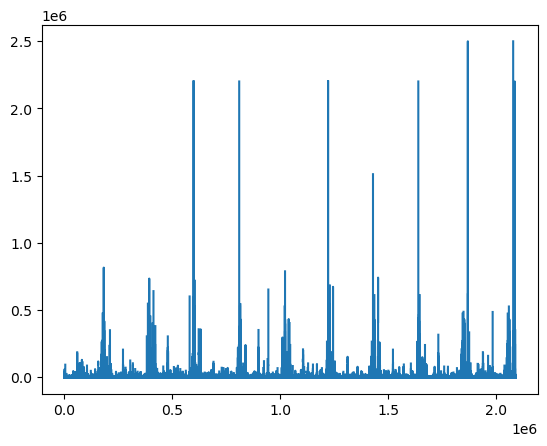

In [266]:
df['BC_ICMS_prod'].plot()

In [267]:
(df['BC_ICMS_prod'] == 0).sum()

73187

<AxesSubplot:>

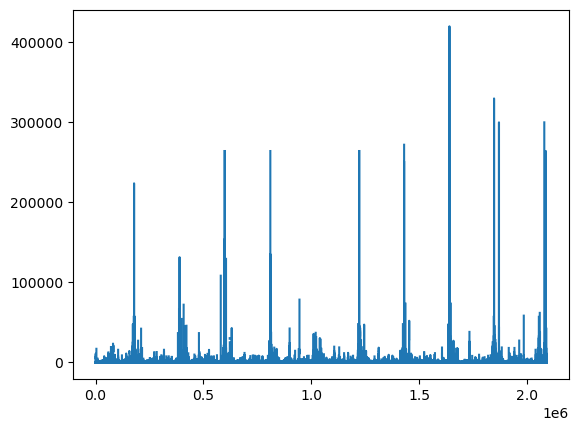

In [268]:
df['Valor_ICMS_prod'].plot()

In [269]:
(df['Valor_ICMS_prod'] == 0).sum()

75323

<AxesSubplot:>

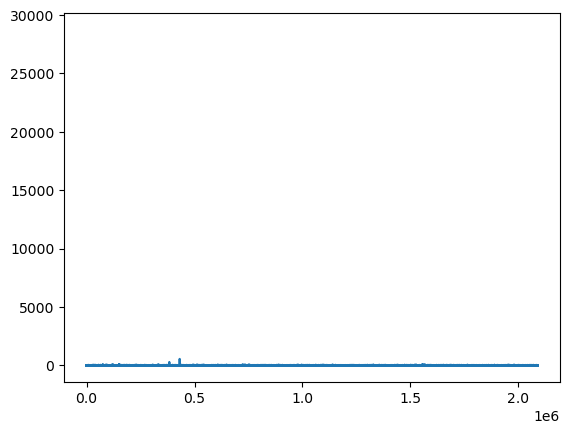

In [270]:
df['Aliq_ICMS_prod'].plot()

In [271]:
(df['Aliq_ICMS_prod'] == 0).sum()

70774

<AxesSubplot:>

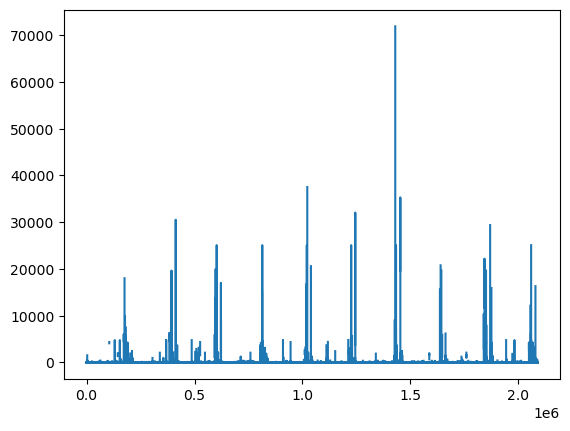

In [272]:
df['Valor_IPI_prod'].plot()

In [273]:
(df['Valor_IPI_prod'] == 0).sum()

478083

<AxesSubplot:>

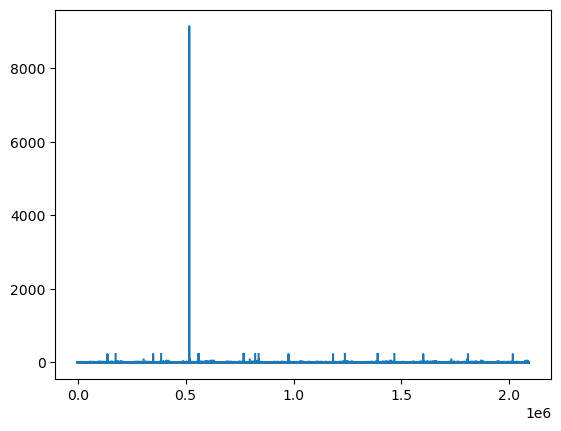

In [274]:
df['Aliq_IPI_prod'].plot()

In [275]:
(df['Aliq_IPI_prod'] == 0).sum()

411736

<AxesSubplot:>

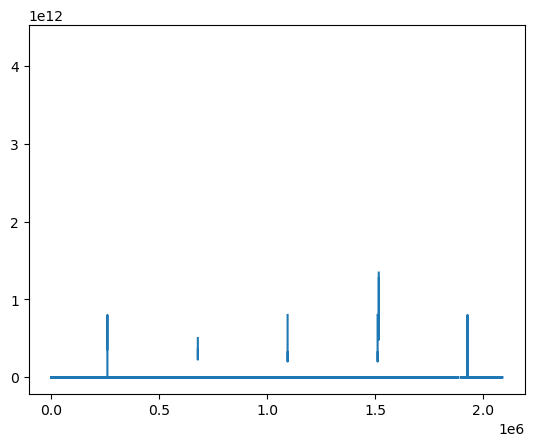

In [276]:
df['Valor_PMC_prod'].plot()

In [277]:
(df['Valor_PMC_prod'] == 0).sum()

114780

In [278]:
len(df['Cod_EAN'].unique())

73881

In [279]:
df['Cod_EAN'].isnull().sum()

1533764

In [280]:
len(df['Unid_prod'].unique())

872

In [281]:
df['Unid_prod'].isnull().sum()

22263

## Dados temporais

In [282]:
date_group = df.groupby(df['Data_de_emissao'].dt.date).size().reset_index(name='count')
date_group

,Data_de_emissao,count
0,2016-01-01,19
1,2016-01-02,49
2,2016-01-03,7
3,2016-01-04,1927
4,2016-01-05,2853
...,...,...
361,2016-12-27,18005
362,2016-12-28,17646
363,2016-12-29,19551
364,2016-12-30,8044


<AxesSubplot:xlabel='Data_de_emissao'>

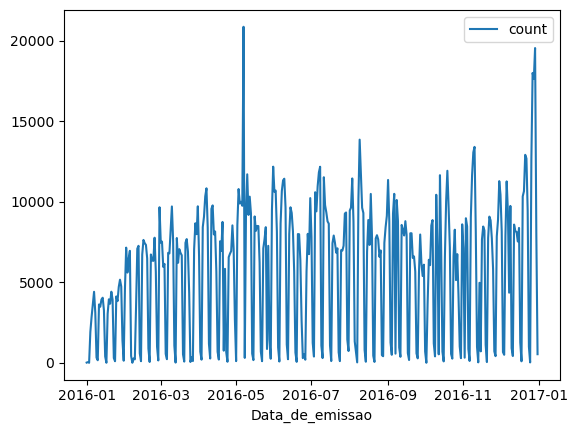

In [283]:
date_group.plot(x='Data_de_emissao', y='count')

In [284]:
date_group['Data_de_emissao'] = pd.to_datetime(date_group['Data_de_emissao'])
date_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data_de_emissao  366 non-null    datetime64[ns]
 1   count            366 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [285]:
date_group['mes'] = date_group['Data_de_emissao'].dt.month
date_group

,Data_de_emissao,count,mes
0,2016-01-01,19,1
1,2016-01-02,49,1
2,2016-01-03,7,1
3,2016-01-04,1927,1
4,2016-01-05,2853,1
...,...,...,...
361,2016-12-27,18005,12
362,2016-12-28,17646,12
363,2016-12-29,19551,12
364,2016-12-30,8044,12


In [286]:
month_group = df.groupby(df['Data_de_emissao'].dt.month).size().reset_index(name='count')
month_group

,Data_de_emissao,count
0,1,78779
1,2,130511
2,3,163694
3,4,167328
4,5,217045
5,6,181889
6,7,194690
7,8,201777
8,9,171815
9,10,160320


Text(0, 0.5, 'Quantidade de Registros')

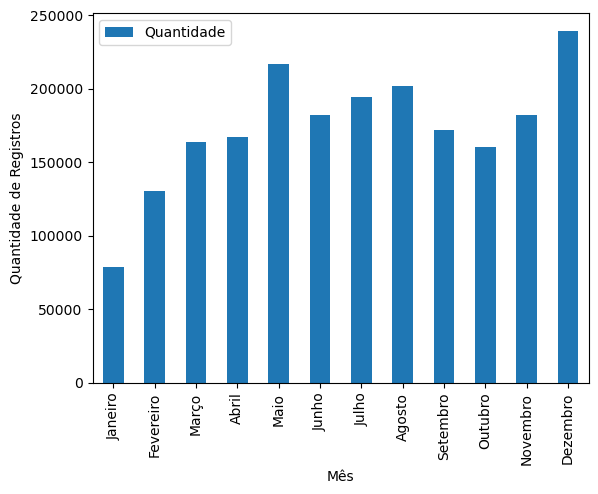

In [362]:
month_names = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

month_group['Mês'] = month_group['Data_de_emissao'].map(month_names)
month_group.plot.bar(x='Mês', y='count', label='Quantidade')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Registros')

## Correlação entre as variáveis

In [288]:
corr_matrix = df[['Valor_total_da_nota', 'Base_de_Calculo_do_ICMS', 'Valor_do_ICMS', 'Valor_total_dos_produtos', 'Valor_do_frete', 'Valor_do_seguro', 'Valor_desconto', 'Valor_outras_despesas_acessorias', 'Valor_do_IPI', 'Quant_prod', 'Valor_unit_prod', 'Valor_total_prod', 'Valor_desconto_item', 'Valor_ICMS_prod', 'Aliq_ICMS_prod', 'Valor_IPI_prod', 'Aliq_IPI_prod']].corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0, 0.5, 'Valor_total_da_nota'),
  Text(0, 1.5, 'Base_de_Calculo_do_ICMS'),
  Text(0, 2.5, 'Valor_do_ICMS'),
  Text(0, 3.5, 'Valor_total_dos_produtos'),
  Text(0, 4.5, 'Valor_do_frete'),
  Text(0, 5.5, 'Valor_do_seguro'),
  Text(0, 6.5, 'Valor_desconto'),
  Text(0, 7.5, 'Valor_outras_despesas_acessorias'),
  Text(0, 8.5, 'Valor_do_IPI'),
  Text(0, 9.5, 'Quant_prod'),
  Text(0, 10.5, 'Valor_unit_prod'),
  Text(0, 11.5, 'Valor_total_prod'),
  Text(0, 12.5, 'Valor_desconto_item'),
  Text(0, 13.5, 'Valor_ICMS_prod'),
  Text(0, 14.5, 'Aliq_ICMS_prod'),
  Text(0, 15.5, 'Valor_IPI_prod'),
  Text(0, 16.5, 'Aliq_IPI_prod')])

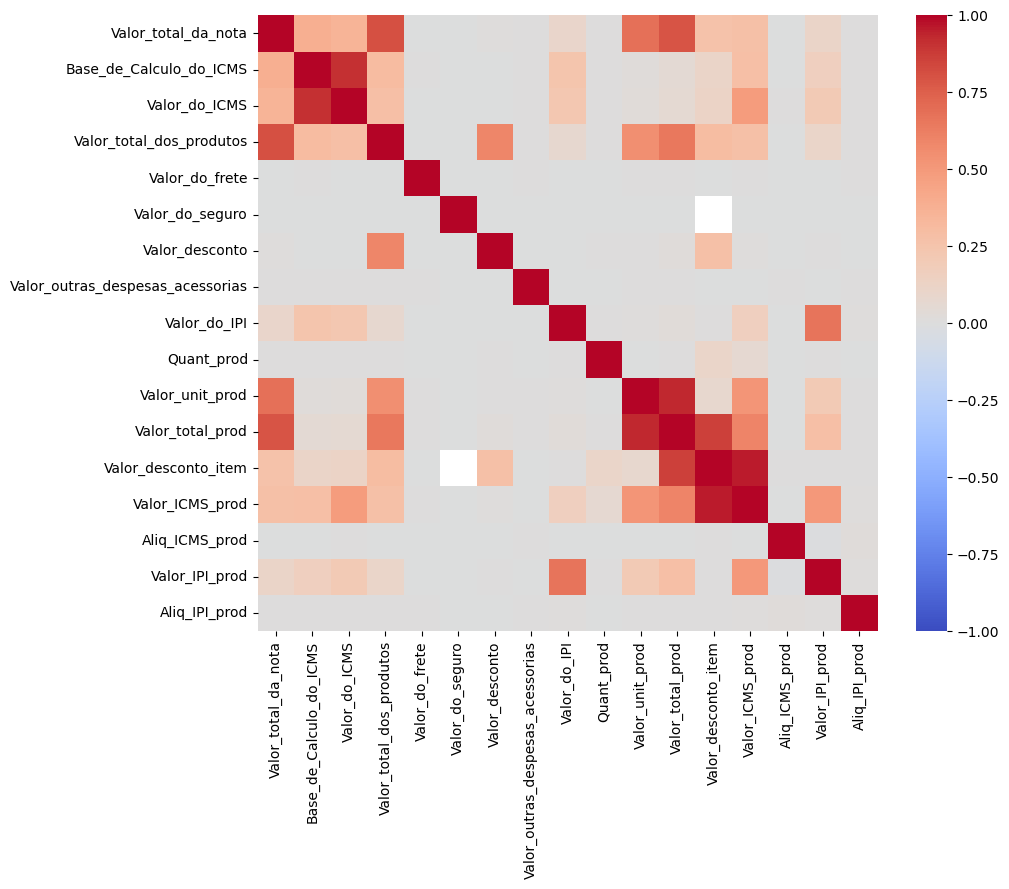

In [289]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

<AxesSubplot:xlabel='Valor_do_ICMS', ylabel='Base_de_Calculo_do_ICMS'>

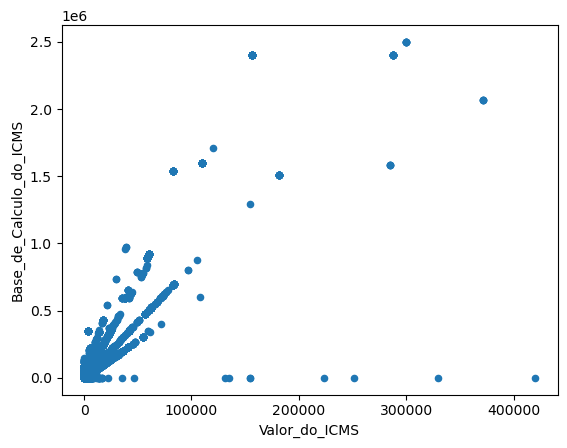

In [290]:
df.plot.scatter(x='Valor_do_ICMS', y='Base_de_Calculo_do_ICMS')

<AxesSubplot:xlabel='Valor_total_da_nota', ylabel='Valor_total_dos_produtos'>

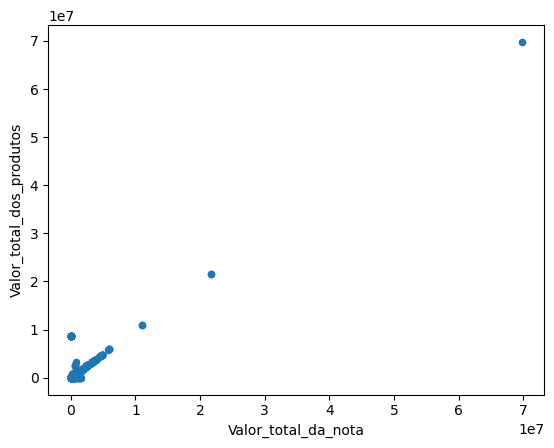

In [291]:
df.plot.scatter(x='Valor_total_da_nota', y='Valor_total_dos_produtos')

In [292]:
df_high = df[df['Valor_total_da_nota'] > 1000000]
pd.set_option('display.max_columns', None)
df_high.head(5)

,Numero,Data_de_emissao,Situacao,Valor_total_da_nota,CPF_CNPJ_emit,Bairro_distrito_emit,CEP_emit,Municipio_emit,CPF_CNPJ_dest,Bairro_distrito_dest,CEP_dest,Municipio_dest,Base_de_Calculo_do_ICMS,Valor_do_ICMS,Valor_total_dos_produtos,Valor_do_frete,Valor_do_seguro,Valor_desconto,Valor_outras_despesas_acessorias,Valor_do_IPI,Nr_item,Cod_prod,NCM_prod,CST_prod,CFOP_prod,Quant_prod,Valor_unit_prod,Valor_total_prod,Valor_desconto_item,BC_ICMS_prod,Valor_ICMS_prod,Aliq_ICMS_prod,Valor_IPI_prod,Aliq_IPI_prod,Valor_PMC_prod,Cod_EAN,Unid_prod
177118,3361,2016-03-31 09:45:55,a,3771000.0,4207672000123,zona rural,59507000.0,alto do rodrigues,7531295000252,jaguaribe,58015020.0,joao pessoa,1508400.0,181008.0,3771000.0,0.0,0.0,0.0,0.0,0.0,1,19229,10051000.0,20.0,2201.0,200000.0,5.92,1184000.0,NaN,473600.0,56832.0,12.0,NaN,NaN,NaN,NaN,kg
177119,3361,2016-03-31 09:45:55,a,3771000.0,4207672000123,zona rural,59507000.0,alto do rodrigues,7531295000252,jaguaribe,58015020.0,joao pessoa,1508400.0,181008.0,3771000.0,0.0,0.0,0.0,0.0,0.0,2,38126,10051000.0,20.0,2201.0,100000.0,5.92,592000.0,NaN,236800.0,28416.0,12.0,NaN,NaN,NaN,NaN,kg
177120,3361,2016-03-31 09:45:55,a,3771000.0,4207672000123,zona rural,59507000.0,alto do rodrigues,7531295000252,jaguaribe,58015020.0,joao pessoa,1508400.0,181008.0,3771000.0,0.0,0.0,0.0,0.0,0.0,3,19318,7133391.0,20.0,2201.0,20000.0,13.20,264000.0,NaN,105600.0,12672.0,12.0,NaN,NaN,NaN,NaN,kg
177121,3361,2016-03-31 09:45:55,a,3771000.0,4207672000123,zona rural,59507000.0,alto do rodrigues,7531295000252,jaguaribe,58015020.0,joao pessoa,1508400.0,181008.0,3771000.0,0.0,0.0,0.0,0.0,0.0,4,19331,7133391.0,20.0,2201.0,80000.0,13.20,1056000.0,NaN,422400.0,50688.0,12.0,NaN,NaN,NaN,NaN,kg
177122,3361,2016-03-31 09:45:55,a,3771000.0,4207672000123,zona rural,59507000.0,alto do rodrigues,7531295000252,jaguaribe,58015020.0,joao pessoa,1508400.0,181008.0,3771000.0,0.0,0.0,0.0,0.0,0.0,5,22154,7133391.0,20.0,2201.0,50000.0,13.50,675000.0,NaN,270000.0,32400.0,12.0,NaN,NaN,NaN,NaN,kg


In [293]:
(df['Valor_total_da_nota'] > 100000).sum()

15909

In [294]:
df_high['Valor_total_da_nota'].describe()

count    7.160000e+02
mean     2.138088e+06
std      2.929650e+06
min      1.003924e+06
25%      1.252520e+06
50%      1.595574e+06
75%      2.399999e+06
max      6.977796e+07
Name: Valor_total_da_nota, dtype: float64

<AxesSubplot:>

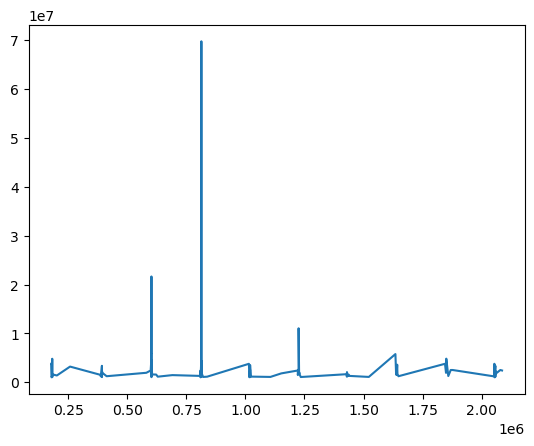

In [295]:
df_high['Valor_total_da_nota'].plot()

<AxesSubplot:>

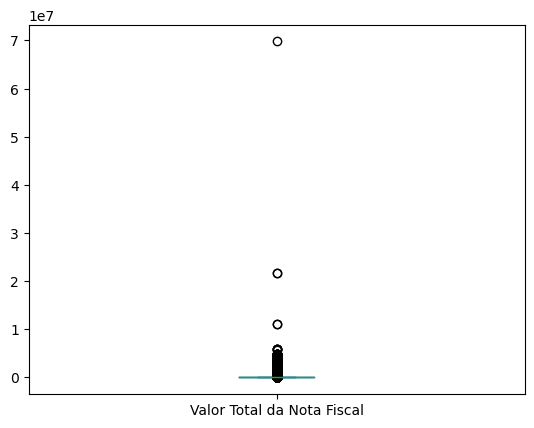

In [369]:
df['Valor_total_da_nota'].plot.box(label='Valor Total da Nota Fiscal')

## Dados transformados logaritmicamente

In [297]:
import numpy as np
df['Log_Valor_Total'] = np.log(df['Valor_total_da_nota'])
df

C:\Users\breno\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Numero,Data_de_emissao,Situacao,Valor_total_da_nota,CPF_CNPJ_emit,Bairro_distrito_emit,CEP_emit,Municipio_emit,CPF_CNPJ_dest,Bairro_distrito_dest,CEP_dest,Municipio_dest,Base_de_Calculo_do_ICMS,Valor_do_ICMS,Valor_total_dos_produtos,Valor_do_frete,Valor_do_seguro,Valor_desconto,Valor_outras_despesas_acessorias,Valor_do_IPI,Nr_item,Cod_prod,NCM_prod,CST_prod,CFOP_prod,Quant_prod,Valor_unit_prod,Valor_total_prod,Valor_desconto_item,BC_ICMS_prod,Valor_ICMS_prod,Aliq_ICMS_prod,Valor_IPI_prod,Aliq_IPI_prod,Valor_PMC_prod,Cod_EAN,Unid_prod,Log_Valor_Total
0,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,1,085213,39261000.0,0.0,5929.0,1.0,9.95,9.95,1.49,0.0,0.0,0.0,0.0,0.0,NaN,7.897833e+12,und,3.828424
1,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,2,088949,96084000.0,0.0,5929.0,1.0,8.30,8.30,1.24,0.0,0.0,0.0,0.0,0.0,NaN,7.898538e+12,und,3.828424
2,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,3,082601,96084000.0,0.0,5929.0,1.0,6.95,6.95,1.04,0.0,0.0,0.0,0.0,0.0,NaN,7.898538e+12,und,3.828424
3,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,4,083267,96082000.0,0.0,5929.0,1.0,3.70,3.70,0.55,0.0,0.0,0.0,0.0,0.0,NaN,3.154147e+12,und,3.828424
4,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,5,084814,84729040.0,0.0,5929.0,1.0,16.50,16.50,2.47,0.0,0.0,0.0,0.0,0.0,NaN,7.897477e+12,und,3.828424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089290,2719,2016-04-25 18:54:15,a,665.11,16576198000196,centro,58900000.0,cajazeiras,10876240000108,centro,58900000.0,cajazeiras,0.0,0.0,665.11,0.0,0.0,0.00,0.0,0.0,50,021732,39241000.0,0.0,5929.0,4.0,2.65,10.60,NaN,0.0,0.0,0.0,0.0,0.0,NaN,7.898288e+12,und,6.499952
2089291,2719,2016-04-25 18:54:15,a,665.11,16576198000196,centro,58900000.0,cajazeiras,10876240000108,centro,58900000.0,cajazeiras,0.0,0.0,665.11,0.0,0.0,0.00,0.0,0.0,51,017788,39241000.0,0.0,5929.0,1.0,1.45,1.45,NaN,0.0,0.0,0.0,0.0,0.0,NaN,7.898288e+12,pacote,6.499952
2089292,2719,2016-04-25 18:54:15,a,665.11,16576198000196,centro,58900000.0,cajazeiras,10876240000108,centro,58900000.0,cajazeiras,0.0,0.0,665.11,0.0,0.0,0.00,0.0,0.0,52,006128,19053100.0,60.0,5929.0,1.0,5.49,5.49,NaN,NaN,NaN,NaN,0.0,0.0,NaN,7.898406e+12,und,6.499952
2089293,2719,2016-04-25 18:54:15,a,665.11,16576198000196,centro,58900000.0,cajazeiras,10876240000108,centro,58900000.0,cajazeiras,0.0,0.0,665.11,0.0,0.0,0.00,0.0,0.0,53,016408,39232190.0,0.0,5929.0,4.0,1.98,7.92,NaN,0.0,0.0,0.0,0.0,0.0,NaN,7.896049e+12,und,6.499952


In [298]:
df_neg = df[df['Log_Valor_Total'] <= 0]
df_neg

,Numero,Data_de_emissao,Situacao,Valor_total_da_nota,CPF_CNPJ_emit,Bairro_distrito_emit,CEP_emit,Municipio_emit,CPF_CNPJ_dest,Bairro_distrito_dest,CEP_dest,Municipio_dest,Base_de_Calculo_do_ICMS,Valor_do_ICMS,Valor_total_dos_produtos,Valor_do_frete,Valor_do_seguro,Valor_desconto,Valor_outras_despesas_acessorias,Valor_do_IPI,Nr_item,Cod_prod,NCM_prod,CST_prod,CFOP_prod,Quant_prod,Valor_unit_prod,Valor_total_prod,Valor_desconto_item,BC_ICMS_prod,Valor_ICMS_prod,Aliq_ICMS_prod,Valor_IPI_prod,Aliq_IPI_prod,Valor_PMC_prod,Cod_EAN,Unid_prod,Log_Valor_Total
1107,357205,2016-07-19 11:55:07,a,1.00,67729178000220,jardim piemont,32669712.0,betim,18730452000194,centro,58220000.0,bananeiras,1.0,0.07,1.00,0.0,0.0,0.0,0.0,0.0,1,021088,30049039.0,0.0,6910.0,20.0,0.05,1.00,NaN,1.0,0.07,7.0,0.0,0.0,NaN,7.896112e+12,caixa,0.000000
4805,39241,2016-04-12 08:37:00,a,0.05,52924099000111,cis cumbica,7224210.0,guarulhos,7900709000192,centro,58800138.0,sousa,0.0,0.00,0.05,0.0,0.0,0.0,0.0,0.0,1,lm31maz,83099000.0,40.0,6911.0,5.0,0.01,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pacote,-2.995732
23359,202819,2016-07-25 09:24:00,a,0.36,8778201000126,varzea,50740080.0,recife,11404674000178,centro,58175000.0,cuite,0.0,0.00,0.36,0.0,0.0,0.0,0.0,0.0,1,6175,30032029.0,60.0,6910.0,1.0,0.36,0.36,NaN,NaN,NaN,NaN,NaN,NaN,100.0,7.896863e+12,cpr,-1.021651
24529,195276,2016-04-20 09:24:00,a,0.70,8778201000126,varzea,50740080.0,recife,12099621000153,centro,58275000.0,itapororoca,0.0,0.00,0.70,0.0,0.0,0.0,0.0,0.0,1,3857,30049066.0,60.0,6910.0,10.0,0.07,0.70,NaN,NaN,NaN,NaN,NaN,NaN,13.0,7.898148e+12,cpr,-0.356675
24530,200493,2016-06-22 17:04:00,a,0.60,8778201000126,varzea,50740080.0,recife,12099621000153,centro,58275000.0,itapororoca,0.0,0.00,0.60,0.0,0.0,0.0,0.0,0.0,1,2007,30041012.0,60.0,6910.0,3.0,0.12,0.36,NaN,NaN,NaN,NaN,NaN,NaN,45.0,7.898148e+12,capsula,-0.510826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088318,7308,2016-12-06 00:00:00,a,0.01,6064175000149,asa norte,70760558.0,brasilia,12671814000137,universitario,58429500.0,campina grande,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,1,0.0,NaN,6933.0,1.0,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,und,-4.605170
2088339,7371,2016-12-09 00:00:00,a,0.02,6064175000149,asa norte,70760558.0,brasilia,12671814000137,universitario,58429500.0,campina grande,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,1,0.0,NaN,6933.0,1.0,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,und,-3.912023
2088347,7423,2016-12-13 00:00:00,a,0.08,6064175000149,asa norte,70760558.0,brasilia,12671814000137,universitario,58429500.0,campina grande,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,1,0.0,NaN,6933.0,1.0,0.08,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,und,-2.525729
2088360,7517,2016-12-20 00:00:00,a,0.02,6064175000149,asa norte,70760558.0,brasilia,12671814000137,universitario,58429500.0,campina grande,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,1,0.0,NaN,6933.0,1.0,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,und,-3.912023


<AxesSubplot:>

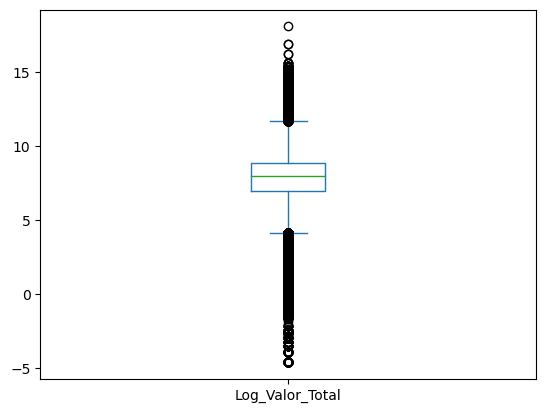

In [299]:
df['Log_Valor_Total'].plot.box()

In [300]:
(df['Log_Valor_Total'] <= 1).sum()

1456

In [301]:
df['Novo_Valor_Total'] = np.maximum(df['Valor_total_da_nota'], 1)
df

,Numero,Data_de_emissao,Situacao,Valor_total_da_nota,CPF_CNPJ_emit,Bairro_distrito_emit,CEP_emit,Municipio_emit,CPF_CNPJ_dest,Bairro_distrito_dest,CEP_dest,Municipio_dest,Base_de_Calculo_do_ICMS,Valor_do_ICMS,Valor_total_dos_produtos,Valor_do_frete,Valor_do_seguro,Valor_desconto,Valor_outras_despesas_acessorias,Valor_do_IPI,Nr_item,Cod_prod,NCM_prod,CST_prod,CFOP_prod,Quant_prod,Valor_unit_prod,Valor_total_prod,Valor_desconto_item,BC_ICMS_prod,Valor_ICMS_prod,Aliq_ICMS_prod,Valor_IPI_prod,Aliq_IPI_prod,Valor_PMC_prod,Cod_EAN,Unid_prod,Log_Valor_Total,Novo_Valor_Total
0,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,1,085213,39261000.0,0.0,5929.0,1.0,9.95,9.95,1.49,0.0,0.0,0.0,0.0,0.0,NaN,7.897833e+12,und,3.828424,45.99
1,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,2,088949,96084000.0,0.0,5929.0,1.0,8.30,8.30,1.24,0.0,0.0,0.0,0.0,0.0,NaN,7.898538e+12,und,3.828424,45.99
2,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,3,082601,96084000.0,0.0,5929.0,1.0,6.95,6.95,1.04,0.0,0.0,0.0,0.0,0.0,NaN,7.898538e+12,und,3.828424,45.99
3,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,4,083267,96082000.0,0.0,5929.0,1.0,3.70,3.70,0.55,0.0,0.0,0.0,0.0,0.0,NaN,3.154147e+12,und,3.828424,45.99
4,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,5,084814,84729040.0,0.0,5929.0,1.0,16.50,16.50,2.47,0.0,0.0,0.0,0.0,0.0,NaN,7.897477e+12,und,3.828424,45.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089290,2719,2016-04-25 18:54:15,a,665.11,16576198000196,centro,58900000.0,cajazeiras,10876240000108,centro,58900000.0,cajazeiras,0.0,0.0,665.11,0.0,0.0,0.00,0.0,0.0,50,021732,39241000.0,0.0,5929.0,4.0,2.65,10.60,NaN,0.0,0.0,0.0,0.0,0.0,NaN,7.898288e+12,und,6.499952,665.11
2089291,2719,2016-04-25 18:54:15,a,665.11,16576198000196,centro,58900000.0,cajazeiras,10876240000108,centro,58900000.0,cajazeiras,0.0,0.0,665.11,0.0,0.0,0.00,0.0,0.0,51,017788,39241000.0,0.0,5929.0,1.0,1.45,1.45,NaN,0.0,0.0,0.0,0.0,0.0,NaN,7.898288e+12,pacote,6.499952,665.11
2089292,2719,2016-04-25 18:54:15,a,665.11,16576198000196,centro,58900000.0,cajazeiras,10876240000108,centro,58900000.0,cajazeiras,0.0,0.0,665.11,0.0,0.0,0.00,0.0,0.0,52,006128,19053100.0,60.0,5929.0,1.0,5.49,5.49,NaN,NaN,NaN,NaN,0.0,0.0,NaN,7.898406e+12,und,6.499952,665.11
2089293,2719,2016-04-25 18:54:15,a,665.11,16576198000196,centro,58900000.0,cajazeiras,10876240000108,centro,58900000.0,cajazeiras,0.0,0.0,665.11,0.0,0.0,0.00,0.0,0.0,53,016408,39232190.0,0.0,5929.0,4.0,1.98,7.92,NaN,0.0,0.0,0.0,0.0,0.0,NaN,7.896049e+12,und,6.499952,665.11


In [302]:
df['Log_Valor_Total'] = np.log(df['Novo_Valor_Total'])
df

,Numero,Data_de_emissao,Situacao,Valor_total_da_nota,CPF_CNPJ_emit,Bairro_distrito_emit,CEP_emit,Municipio_emit,CPF_CNPJ_dest,Bairro_distrito_dest,CEP_dest,Municipio_dest,Base_de_Calculo_do_ICMS,Valor_do_ICMS,Valor_total_dos_produtos,Valor_do_frete,Valor_do_seguro,Valor_desconto,Valor_outras_despesas_acessorias,Valor_do_IPI,Nr_item,Cod_prod,NCM_prod,CST_prod,CFOP_prod,Quant_prod,Valor_unit_prod,Valor_total_prod,Valor_desconto_item,BC_ICMS_prod,Valor_ICMS_prod,Aliq_ICMS_prod,Valor_IPI_prod,Aliq_IPI_prod,Valor_PMC_prod,Cod_EAN,Unid_prod,Log_Valor_Total,Novo_Valor_Total
0,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,1,085213,39261000.0,0.0,5929.0,1.0,9.95,9.95,1.49,0.0,0.0,0.0,0.0,0.0,NaN,7.897833e+12,und,3.828424,45.99
1,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,2,088949,96084000.0,0.0,5929.0,1.0,8.30,8.30,1.24,0.0,0.0,0.0,0.0,0.0,NaN,7.898538e+12,und,3.828424,45.99
2,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,3,082601,96084000.0,0.0,5929.0,1.0,6.95,6.95,1.04,0.0,0.0,0.0,0.0,0.0,NaN,7.898538e+12,und,3.828424,45.99
3,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,4,083267,96082000.0,0.0,5929.0,1.0,3.70,3.70,0.55,0.0,0.0,0.0,0.0,0.0,NaN,3.154147e+12,und,3.828424,45.99
4,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,5,084814,84729040.0,0.0,5929.0,1.0,16.50,16.50,2.47,0.0,0.0,0.0,0.0,0.0,NaN,7.897477e+12,und,3.828424,45.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089290,2719,2016-04-25 18:54:15,a,665.11,16576198000196,centro,58900000.0,cajazeiras,10876240000108,centro,58900000.0,cajazeiras,0.0,0.0,665.11,0.0,0.0,0.00,0.0,0.0,50,021732,39241000.0,0.0,5929.0,4.0,2.65,10.60,NaN,0.0,0.0,0.0,0.0,0.0,NaN,7.898288e+12,und,6.499952,665.11
2089291,2719,2016-04-25 18:54:15,a,665.11,16576198000196,centro,58900000.0,cajazeiras,10876240000108,centro,58900000.0,cajazeiras,0.0,0.0,665.11,0.0,0.0,0.00,0.0,0.0,51,017788,39241000.0,0.0,5929.0,1.0,1.45,1.45,NaN,0.0,0.0,0.0,0.0,0.0,NaN,7.898288e+12,pacote,6.499952,665.11
2089292,2719,2016-04-25 18:54:15,a,665.11,16576198000196,centro,58900000.0,cajazeiras,10876240000108,centro,58900000.0,cajazeiras,0.0,0.0,665.11,0.0,0.0,0.00,0.0,0.0,52,006128,19053100.0,60.0,5929.0,1.0,5.49,5.49,NaN,NaN,NaN,NaN,0.0,0.0,NaN,7.898406e+12,und,6.499952,665.11
2089293,2719,2016-04-25 18:54:15,a,665.11,16576198000196,centro,58900000.0,cajazeiras,10876240000108,centro,58900000.0,cajazeiras,0.0,0.0,665.11,0.0,0.0,0.00,0.0,0.0,53,016408,39232190.0,0.0,5929.0,4.0,1.98,7.92,NaN,0.0,0.0,0.0,0.0,0.0,NaN,7.896049e+12,und,6.499952,665.11


<AxesSubplot:>

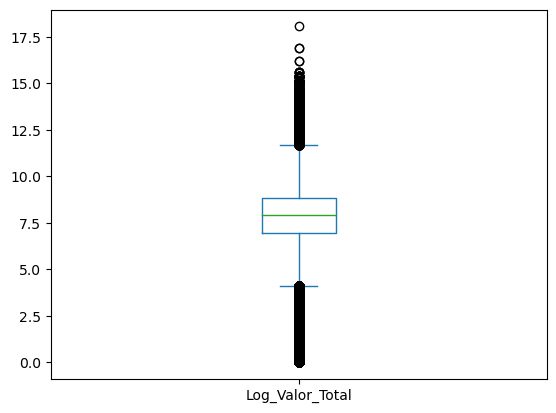

In [303]:
df['Log_Valor_Total'].plot.box()

Text(0, 0.5, 'Frequência')

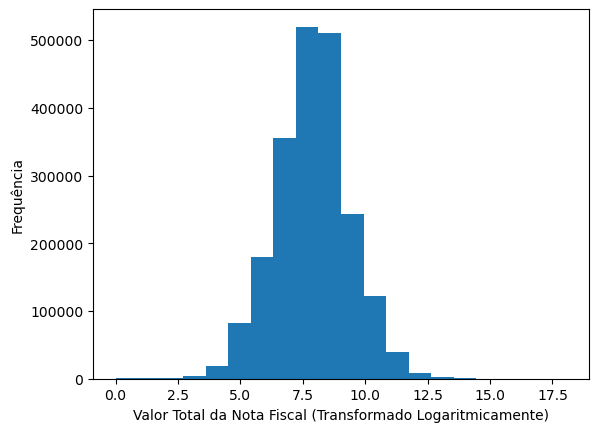

In [335]:
df['Log_Valor_Total'].plot.hist(bins=20)
plt.xlabel('Valor Total da Nota Fiscal (Transformado Logaritmicamente)')
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

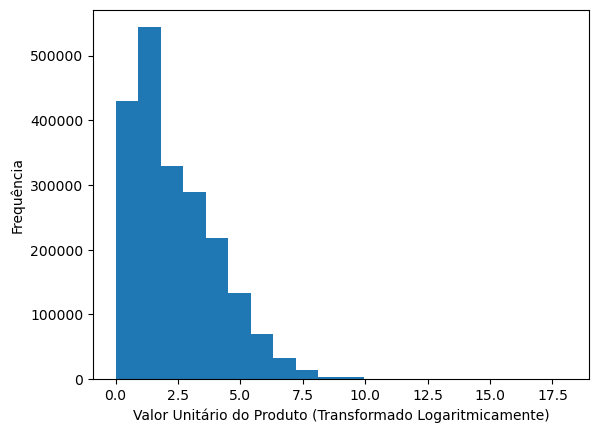

In [348]:
nome_orig = 'Valor_unit_prod'
nome_novo = 'Novo_Valor_unit_prod'
nome_log = 'Log_Valor_unit_prod'

df[nome_novo] = np.maximum(df[nome_orig], 1)
df[nome_log] = np.log(df[nome_novo])
df[nome_log].plot.hist(bins=20)
plt.xlabel('Valor Unitário do Produto (Transformado Logaritmicamente)')
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

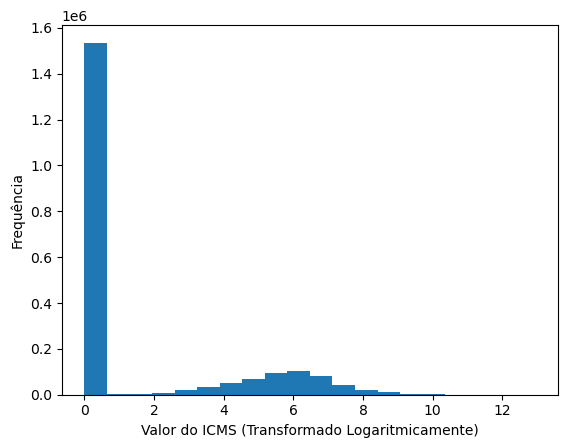

In [358]:
nome_orig = 'Valor_do_ICMS'
nome_novo = 'Novo_Valor_do_ICMS'
nome_log = 'Log_Valor_do_ICMS'

df[nome_novo] = np.maximum(df[nome_orig], 1)
df[nome_log] = np.log(df[nome_novo])
df[nome_log].plot.hist(bins=20)
plt.xlabel('Valor do ICMS (Transformado Logaritmicamente)')
plt.ylabel('Frequência')

In [354]:
df

,Numero,Data_de_emissao,Situacao,Valor_total_da_nota,CPF_CNPJ_emit,Bairro_distrito_emit,CEP_emit,Municipio_emit,CPF_CNPJ_dest,Bairro_distrito_dest,CEP_dest,Municipio_dest,Base_de_Calculo_do_ICMS,Valor_do_ICMS,Valor_total_dos_produtos,Valor_do_frete,Valor_do_seguro,Valor_desconto,Valor_outras_despesas_acessorias,Valor_do_IPI,Nr_item,Cod_prod,NCM_prod,CST_prod,CFOP_prod,Quant_prod,Valor_unit_prod,Valor_total_prod,Valor_desconto_item,BC_ICMS_prod,Valor_ICMS_prod,Aliq_ICMS_prod,Valor_IPI_prod,Aliq_IPI_prod,Valor_PMC_prod,Cod_EAN,Unid_prod,Log_Valor_Total,Novo_Valor_Total,Novo_Valor_unit_prod,Log_Valor_unit_prod,Novo_Valor_do_frete,Log_Valor_do_frete,Novo_Valor_do_ICMS,Log_Valor_do_ICMS
0,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,1,085213,39261000.0,0.0,5929.0,1.0,9.95,9.95,1.49,0.0,0.0,0.0,0.0,0.0,NaN,7.897833e+12,und,3.828424,45.99,9.95,2.297573,1.0,0.0,1.0,0.0
1,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,2,088949,96084000.0,0.0,5929.0,1.0,8.30,8.30,1.24,0.0,0.0,0.0,0.0,0.0,NaN,7.898538e+12,und,3.828424,45.99,8.30,2.116256,1.0,0.0,1.0,0.0
2,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,3,082601,96084000.0,0.0,5929.0,1.0,6.95,6.95,1.04,0.0,0.0,0.0,0.0,0.0,NaN,7.898538e+12,und,3.828424,45.99,6.95,1.938742,1.0,0.0,1.0,0.0
3,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,4,083267,96082000.0,0.0,5929.0,1.0,3.70,3.70,0.55,0.0,0.0,0.0,0.0,0.0,NaN,3.154147e+12,und,3.828424,45.99,3.70,1.308333,1.0,0.0,1.0,0.0
4,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.10,0.0,0.0,8.11,0.0,0.0,5,084814,84729040.0,0.0,5929.0,1.0,16.50,16.50,2.47,0.0,0.0,0.0,0.0,0.0,NaN,7.897477e+12,und,3.828424,45.99,16.50,2.803360,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089290,2719,2016-04-25 18:54:15,a,665.11,16576198000196,centro,58900000.0,cajazeiras,10876240000108,centro,58900000.0,cajazeiras,0.0,0.0,665.11,0.0,0.0,0.00,0.0,0.0,50,021732,39241000.0,0.0,5929.0,4.0,2.65,10.60,NaN,0.0,0.0,0.0,0.0,0.0,NaN,7.898288e+12,und,6.499952,665.11,2.65,0.974560,1.0,0.0,1.0,0.0
2089291,2719,2016-04-25 18:54:15,a,665.11,16576198000196,centro,58900000.0,cajazeiras,10876240000108,centro,58900000.0,cajazeiras,0.0,0.0,665.11,0.0,0.0,0.00,0.0,0.0,51,017788,39241000.0,0.0,5929.0,1.0,1.45,1.45,NaN,0.0,0.0,0.0,0.0,0.0,NaN,7.898288e+12,pacote,6.499952,665.11,1.45,0.371564,1.0,0.0,1.0,0.0
2089292,2719,2016-04-25 18:54:15,a,665.11,16576198000196,centro,58900000.0,cajazeiras,10876240000108,centro,58900000.0,cajazeiras,0.0,0.0,665.11,0.0,0.0,0.00,0.0,0.0,52,006128,19053100.0,60.0,5929.0,1.0,5.49,5.49,NaN,NaN,NaN,NaN,0.0,0.0,NaN,7.898406e+12,und,6.499952,665.11,5.49,1.702928,1.0,0.0,1.0,0.0
2089293,2719,2016-04-25 18:54:15,a,665.11,16576198000196,centro,58900000.0,cajazeiras,10876240000108,centro,58900000.0,cajazeiras,0.0,0.0,665.11,0.0,0.0,0.00,0.0,0.0,53,016408,39232190.0,0.0,5929.0,4.0,1.98,7.92,NaN,0.0,0.0,0.0,0.0,0.0,NaN,7.896049e+12,und,6.499952,665.11,1.98,0.683097,1.0,0.0,1.0,0.0


In [355]:
df['Valor_do_ICMS'].describe()

count    2.089295e+06
mean     2.712231e+02
std      2.417768e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.137000e+01
max      4.198207e+05
Name: Valor_do_ICMS, dtype: float64

In [333]:
import math

log_value = 10
original_value = math.exp(log_value)
original_value

22026.465794806718

In [305]:
df_high = df[df['Log_Valor_Total'] > 7]
df_high.head(5)

,Numero,Data_de_emissao,Situacao,Valor_total_da_nota,CPF_CNPJ_emit,Bairro_distrito_emit,CEP_emit,Municipio_emit,CPF_CNPJ_dest,Bairro_distrito_dest,CEP_dest,Municipio_dest,Base_de_Calculo_do_ICMS,Valor_do_ICMS,Valor_total_dos_produtos,Valor_do_frete,Valor_do_seguro,Valor_desconto,Valor_outras_despesas_acessorias,Valor_do_IPI,Nr_item,Cod_prod,NCM_prod,CST_prod,CFOP_prod,Quant_prod,Valor_unit_prod,Valor_total_prod,Valor_desconto_item,BC_ICMS_prod,Valor_ICMS_prod,Aliq_ICMS_prod,Valor_IPI_prod,Aliq_IPI_prod,Valor_PMC_prod,Cod_EAN,Unid_prod,Log_Valor_Total,Novo_Valor_Total
12,2996,2016-01-27 11:44:00,a,4936.66,497918000198,universitario,58429120.0,campina grande,3107781000106,centro,58400052.0,campina grande,0.00,0.00,4936.67,0.0,0.0,0.01,0.0,0.0,1,2,27101259.0,60.0,5929.0,1469.25,3.36,4936.67,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l,8.504444,4936.66
13,22465,2016-06-16 10:10:00,a,1386.00,8540403000135,tambia,58020540.0,joao pessoa,3107781000106,prata,58400052.0,campina grande,0.00,0.00,1386.00,0.0,0.0,0.00,0.0,0.0,1,cfop5949,49111090.0,40.0,5949.0,10000.00,0.14,1386.00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,und,7.234177,1386.00
18,1617,2016-12-14 11:50:00,a,6102.28,13131876000119,itarare,58411052.0,campina grande,3107781000106,prata,58400052.0,campina grande,6102.28,1098.43,6102.28,0.0,0.0,0.00,0.0,0.0,1,7609,28289011.0,0.0,5102.0,22.00,3.60,79.20,NaN,79.2,14.26,18.0,NaN,NaN,NaN,NaN,und,8.716418,6102.28
19,1617,2016-12-14 11:50:00,a,6102.28,13131876000119,itarare,58411052.0,campina grande,3107781000106,prata,58400052.0,campina grande,6102.28,1098.43,6102.28,0.0,0.0,0.00,0.0,0.0,2,7105,39249000.0,0.0,5102.0,9.00,25.00,225.00,NaN,225.0,40.50,18.0,NaN,NaN,NaN,NaN,und,8.716418,6102.28
20,1617,2016-12-14 11:50:00,a,6102.28,13131876000119,itarare,58411052.0,campina grande,3107781000106,prata,58400052.0,campina grande,6102.28,1098.43,6102.28,0.0,0.0,0.00,0.0,0.0,3,7857,39241000.0,0.0,5102.0,5.00,117.00,585.00,NaN,585.0,105.30,18.0,NaN,NaN,NaN,NaN,cx,8.716418,6102.28


## Outras distribuições

In [306]:
df['Situacao'].value_counts()

a    2007581
c      81487
i        225
d          2
Name: Situacao, dtype: int64

In [307]:
df['Bairro_distrito_emit'].value_counts()

centro              1139505
tambor                69754
catole                55133
sao jose              50961
torre                 39054
                     ...   
praia do canto            1
pineville                 1
logo sul                  1
ponta da terra            1
taguatinga norte          1
Name: Bairro_distrito_emit, Length: 1738, dtype: int64

In [308]:
df['Bairro_distrito_emit'].nunique()

1738

In [309]:
df['Municipio_emit'].value_counts()

campina grande               455888
joao pessoa                  255515
guarabira                     94969
patos                         87237
cajazeiras                    75161
                              ...  
paramoti                          1
guamare                           1
são josé                          1
santo antonio da patrulha         1
remígio                           1
Name: Municipio_emit, Length: 685, dtype: int64

In [310]:
df['Municipio_emit'].nunique()

685

In [311]:
df['CPF_CNPJ_emit'].value_counts()

10831701000126    63845
15218561000139    33793
2775367000102     26874
3467684000124     26246
18107594000108    20545
                  ...  
60160975000109        1
19789655000119        1
44013159008010        1
3089225000154         1
11903016000392        1
Name: CPF_CNPJ_emit, Length: 9384, dtype: int64

In [312]:
df['CPF_CNPJ_emit'].nunique()

9384

In [313]:
df['Cod_prod'].value_counts()

1             13568
2              8571
000001         8265
01             7612
3              5168
              ...  
0000002740        1
0000001226        1
0000001843        1
007988            1
016408            1
Name: Cod_prod, Length: 176397, dtype: int64

In [314]:
df['Cod_prod'].nunique()

176397

In [315]:
df['Unid_prod'].value_counts()

und       1205688
kg         209287
pacote     151012
cx         135102
l           79594
           ...   
669             1
pc/50m          1
1nd             1
617,50          1
106             1
Name: Unid_prod, Length: 871, dtype: int64

In [316]:
df['Unid_prod'].nunique()

871

In [317]:
df['NCM_prod'].value_counts()

30049099.0    76457
30049069.0    44599
87089990.0    33219
27101921.0    30551
49019900.0    27827
              ...  
29042020.0        1
90069900.0        1
29339942.0        1
28331110.0        1
28421090.0        1
Name: NCM_prod, Length: 6004, dtype: int64

In [318]:
df['NCM_prod'].nunique()

6004

<AxesSubplot:xlabel='Valor_total_dos_produtos', ylabel='Quant_prod'>

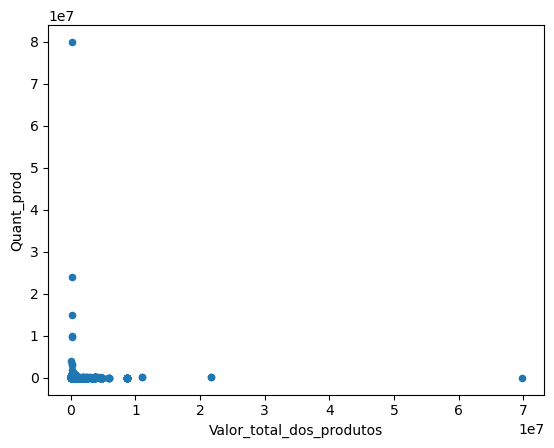

In [319]:
df.plot.scatter(x='Valor_total_dos_produtos', y='Quant_prod')